<a href="https://colab.research.google.com/github/karldeguzman32/CpE-AIML/blob/main/MEX/58033_MEX_deGuzman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Laptop Price Prediction**

#**Problem no.1**

**Purpose of the dataset**

The dataset contains a collection of prices of laptops with different brands or manufactured by various companies including each of their specifications. This dataset provides information specifically the manufacturer or the company, type of laptop, screen size, CPU, RAM, Memory, GPU, operating system, weight, and the prices of laptops in euro and these are also considered as the characteristics of each laptops in the dataset. It aids and brings proper understanding upon the interested consumers in buying laptops according to their needs or what specification they will get depending to their price. 

\\

**Needs statement**

In the field of business, E-commerce market has gradually gained popularity on most of the countries especially amidst pandemic. However, since every marketplaces online always sells a large number of various products, including laptops, product pricing gets harder especially it can get influenced by brands and specifications. Therefore, the dataset can be used with a particular algorithm under machine learning which will bring assistance in predicting laptop prices especially new or newly manufactured and deployed ones. 

\\

**Significance of the dataset**

The primary beneficiary of the dataset are the companies that manufacture and deploy laptops to a particular marketplace in terms of product pricing of laptops based on brand and specifications. In addition, it brings advantage in terms of sales, return of investment, or other sales process of laptop manufacturing companies over competitors with the application of prediction of product sales.

\\

[1] M. Varli, “Laptop Price,” Kaggle, 2020. https://www.kaggle.com/muhammetvarl/laptop-price (accessed Nov. 16, 2021).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re

###**Loading the raw data**

In [ ]:
lp_df = pd.read_csv("laptop_price.csv", encoding='ISO-8859-1')
lp_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
#number of dimension
print(f"The dataset has {lp_df.ndim} dimensions")
#number of rows and cols
print(f"The shape of the data set is {lp_df.shape}")

The dataset has 2 dimensions
The shape of the data set is (1303, 13)


In [ ]:
#features of the dataset
lp_df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

###**Preprocessing**

In [ ]:
lp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
lp_df.describe(include = 'all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


**Data Cleaning**

In [ ]:
lp_df = lp_df.rename(columns = str.lower)
lp_df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [ ]:
lp_df = lp_df.rename(columns={'price_euros':'price'})

**Checking for duplicates**

In [ ]:
lp_df[lp_df.duplicated()]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


**Checking for Missing Values**

In [ ]:
lp_df.isnull().sum()

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

**Determining Features of Interest**

In [ ]:
lp_df = lp_df.drop(["laptop_id"], axis=1)
lp_df.describe(include = 'all')

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
count,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [ ]:
lp_df['price'] = lp_df['price']*57.14
lp_df['price'] = lp_df['price'].round(2)

In [ ]:
lp_df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,76549.89
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,51365.43
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,32855.50
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,144989.89
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,103057.70


In [ ]:
cat_vars = ['company', 'typename', 'memory', 'ram', 'screenresolution', 'opsys']

###**Data Exploration and Visualization**

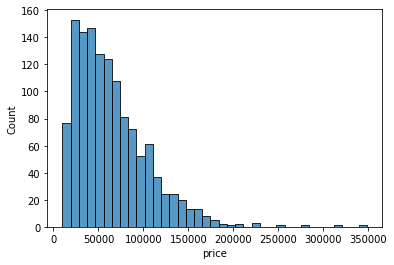

In [ ]:
sns.histplot(lp_df['price'])

In [ ]:
def plot_cat_var(lp_df, var):
    lp_df = lp_df.copy()
    print(f'Number of {var}: ',lp_df[var].nunique())
    print(f'Laptop\'s {var}: ', lp_df[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribution of {var} by price')
    sns.barplot(
        x = var,
        y = 'price',
        data = lp_df
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Price')
    plt.show()

Number of company:  19
Laptop's company:  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


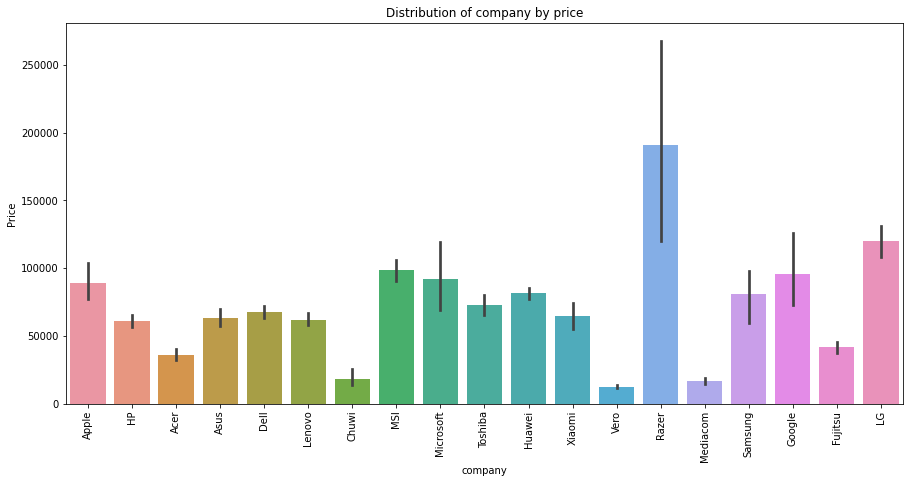

Number of typename:  6
Laptop's typename:  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


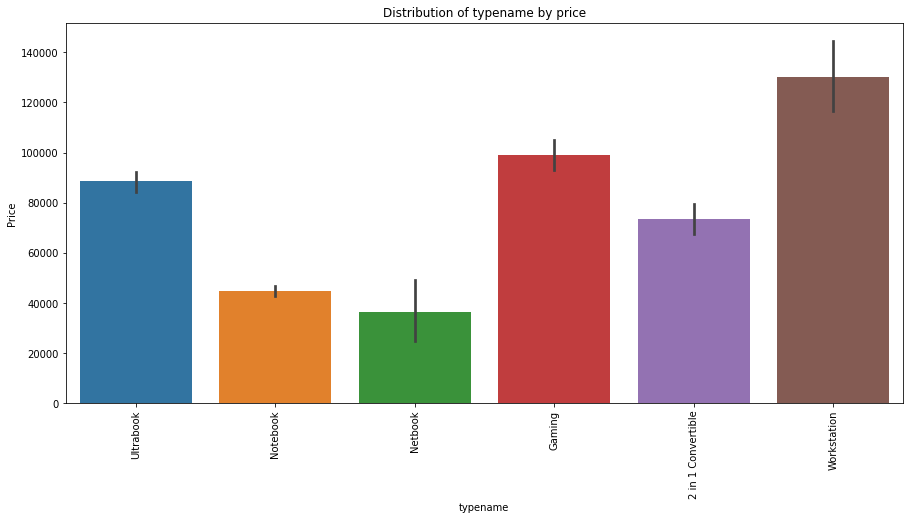

Number of memory:  39
Laptop's memory:  ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


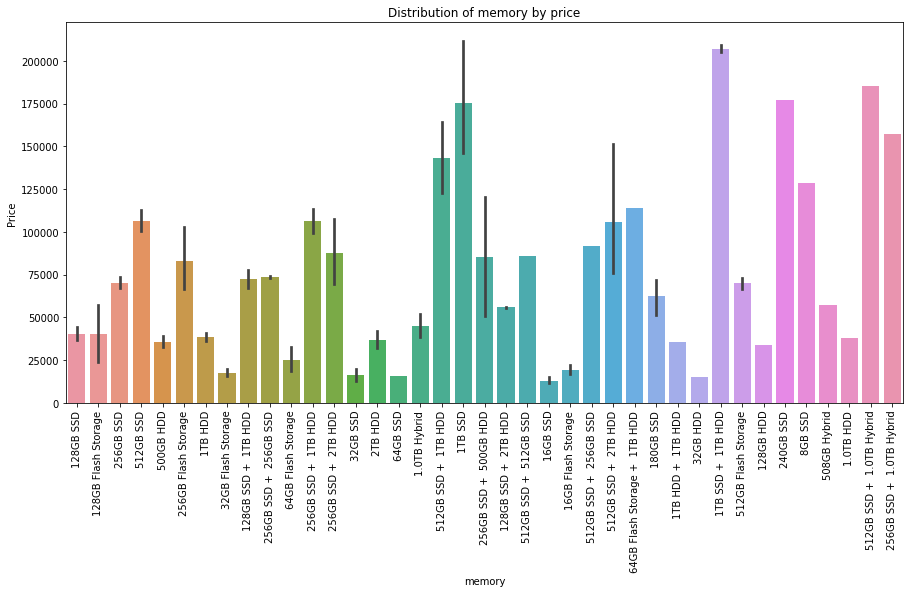

Number of ram:  9
Laptop's ram:  ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


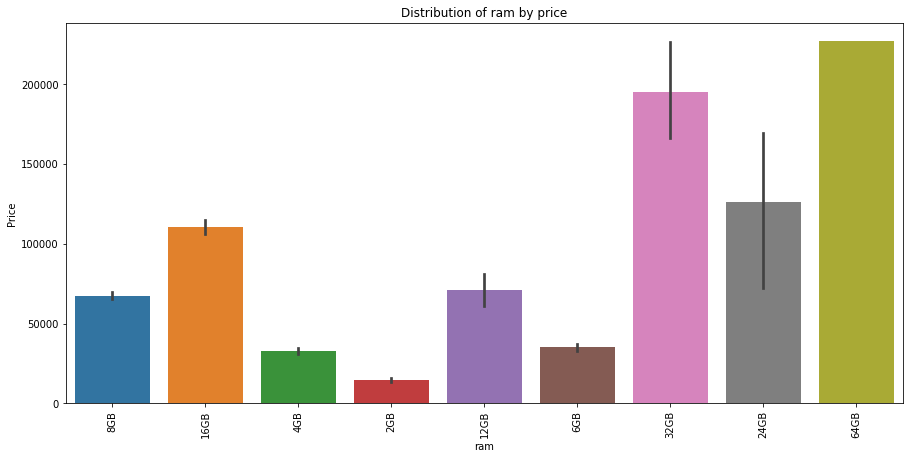

Number of screenresolution:  40
Laptop's screenresolution:  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscre

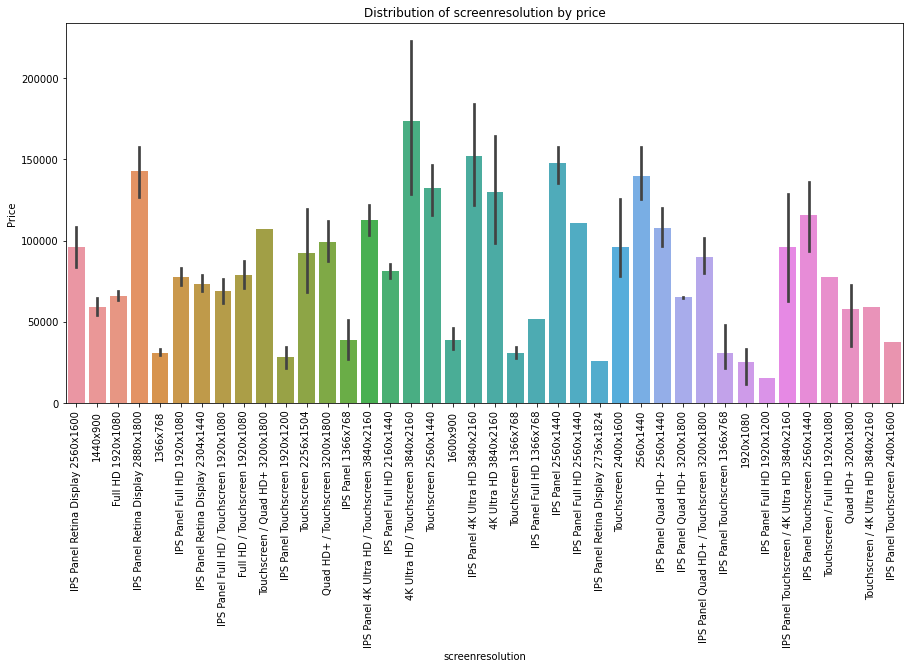

Number of opsys:  9
Laptop's opsys:  ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


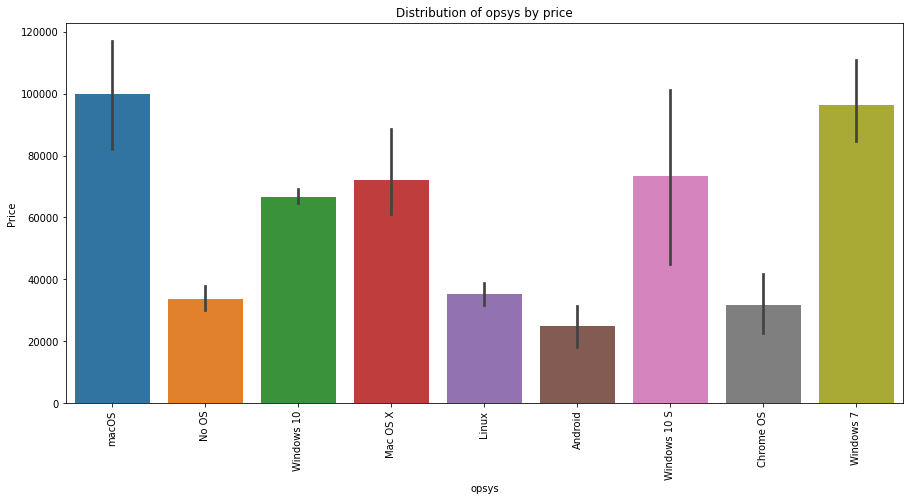

In [ ]:
for var in cat_vars:
    plot_cat_var(lp_df, var)

**Modifying Screen Resolution Feature**

In [ ]:
lp_df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,76549.89
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,51365.43
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,32855.50
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,144989.89
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,103057.70


In [ ]:
lp_df['resolution'] = lp_df['screenresolution'].str.extract(r'(\d+x\d+)')
lp_df = lp_df.drop('screenresolution',  axis = 1)

**Modifying CPU Feature**

In [ ]:
lp_df['cpu_speed'] = lp_df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
lp_df['cpu_speed'] = lp_df['cpu_speed'].str.replace('GHz', '')
lp_df['cpu_speed'] = lp_df['cpu_speed'].astype(float)
lp_df.rename(columns={'cpu_speed': 'cpu_speed(ghz)'}, inplace = True)
lp_df = lp_df.drop('cpu', axis = 1)

**Modifying RAM Feature**

In [ ]:
lp_df['ram'] = lp_df['ram'].str.replace('GB', '')
lp_df.rename(columns={'ram': 'ram(GB)'}, inplace = True)
lp_df['ram(GB)'] = lp_df['ram(GB)'].astype(int)

**Modifying Weight Feature**

In [ ]:
lp_df['weight'] = lp_df['weight'].str.replace('kg', '').astype(float)
lp_df.rename(columns={'weight': 'weight(kg)'}, inplace = True)

In [ ]:
lp_df.head()

,company,product,typename,inches,ram(GB),memory,gpu,opsys,weight(kg),price,resolution,cpu_speed(ghz)
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,76549.89,2560x1600,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,51365.43,1440x900,1.8
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,32855.50,1920x1080,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,144989.89,2880x1800,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,103057.70,2560x1600,3.1


In [ ]:
lp_df.corr()['price']

inches            0.068197
ram(GB)           0.743007
weight(kg)        0.210370
price             1.000000
cpu_speed(ghz)    0.430293
Name: price, dtype: float64

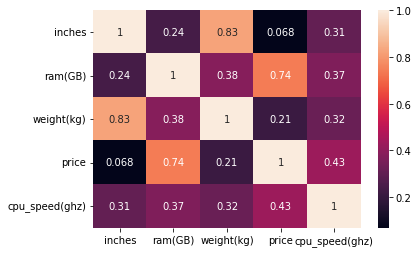

In [ ]:
sns.heatmap(lp_df.corr(), annot=True)

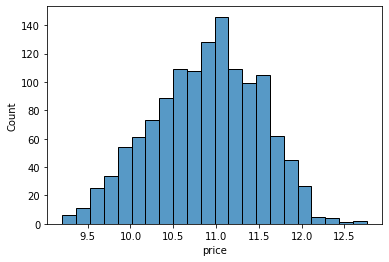

In [ ]:
sns.histplot(np.log(lp_df['price']))

In [ ]:
lp_df.head()

,company,product,typename,inches,ram(GB),memory,gpu,opsys,weight(kg),price,resolution,cpu_speed(ghz)
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,76549.89,2560x1600,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,51365.43,1440x900,1.8
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,32855.50,1920x1080,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,144989.89,2880x1800,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,103057.70,2560x1600,3.1


In [ ]:
x = lp_df.drop(columns=['price', 'company', 'product', 'typename', 'memory', 'gpu', 'opsys', 'resolution'], axis=1)
y = np.log(lp_df['price'])
x.head()

,inches,ram(GB),weight(kg),cpu_speed(ghz)
0,13.3,8,1.37,2.3
1,13.3,8,1.34,1.8
2,15.6,8,1.86,2.5
3,15.4,16,1.83,2.7
4,13.3,8,1.37,3.1


In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

#**Problem no. 2**

**Random Forest**

The random forest classifier consists of large number of individual decision trees that operate as an ensemble. For each individual tree in the random forest, it spits out the class prediction and the class with the most votes to become the mode's prediction. The fundamental concept behind random forest is a simple but powerful one is the wisdom of crowds. The reason is that the large number of relatively uncorrelated models operating as a committee will outperform any of the individual constituent models. In general, the random forest modelling is a classification algorithm consisting of many decision trees. It uses bagging and feature randomness when creating each individual tree to try to create an uncorrelated forest of trees that the prediction by the committee is more accurate than any individual tree.

\

**Linear Regression**

The linear regression is an analysis that is used to predict value of a variable based on the value of another variable, it estimates the relationship between one independent variable and one dependent variable using a straight light and both variables should be quantitative. For the representation of Linear Regression, it is a linear equation that combines a specific set of input values (x) and the solution to which is the predicted output for the set of input values (y). both input values (x) should have a numeric value. 

\

**XGBOOST**

The XGBoost is an algorithm that recently been dominating applied in machine learning, XGBoost is an implementation gradient boosted decision trees designed for speed and performance. It is best use in predicting problems involving unstructured data such as images, text etc. In addition One of the most differences between the XGBoost and the random forest is that the XGBoost always gives more importance to functional space when reducing the cost of a model while the Random forest tries to give more preferences to hyperparameters to optimize the model.

\

[2] Towardsdatascience, “Understanding Random Forest.” Understanding Random Forest. How the Algorithm Works and Why it Is… | by Tony Yiu | Towards Data Science (accessed November 16, 2021).

[3] Machine Learning Mastery, “Linear Regression for Machine Learning.” Linear Regression for Machine Learning (machinelearningmastery.com) (accessed November 16, 2021).

[4] Machine Learning Mastery, “A Gentle Introduction to XGBoost for Applied Machine Learning.” A Gentle Introduction to XGBoost for Applied Machine Learning (machinelearningmastery.com) (accessed November 16, 2021).

[5] Aman Gupta, “XGBoost versus Random Forest.” Geek Culture. XGBoost versus Random Forest. This article explores the superiority… | by Aman Gupta | Geek Culture | Medium (accessed November 16, 2021).

**Modelling using Random Forest**

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth=100, max_features=4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features=4)

In [ ]:
y_pred=rf.predict(x_test)
lp_df1 = pd.DataFrame({'Real Values': y_test, 'Predicted values': y_pred})
lp_df1.head(10)

,Real Values,Predicted values
479,11.467280,11.407587
1022,11.092152,11.270302
298,10.258110,10.331038
1265,10.846787,11.329603
774,11.171592,11.263331
115,11.289010,11.324323
582,10.623366,10.738523
527,10.174555,10.277731
380,11.128053,11.628250
101,9.900576,9.727950


In [ ]:
print("R2 using Random Forest: {:.2f} %".format(np.round(r2_score(y_test, y_pred),4)*100))


R2 using Random Forest: 79.09 %


In [ ]:
rf.score(x_train,y_train)

0.947641617700223

In [ ]:
rf.score(x_test,y_test)

0.7909398542882788

In [ ]:
print(str((rf.score(x_train,y_train)-rf.score(x_test,y_test))*100)+'%')

15.67017634119442%


**Modelling using Multiple Linear Regression**

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(x_test)
y_prediction

array([11.10752486, 11.10478684, 10.6601872 , 10.90057273, 10.73410545,
       10.76134682, 10.70061981, 10.69442957, 10.81281901, 10.16256894,
       11.70160541, 10.89146618, 10.61266173, 10.95166228, 11.53220775,
       10.68660198, 11.16908997, 10.96626507, 11.30108907, 11.89212941,
       11.42179439, 10.53199998, 11.08151366, 10.47236885, 10.69299069,
       10.73992005, 10.58172052, 10.54569009, 11.09702911, 10.93251632,
       10.66475057, 11.07291748, 11.10250516, 10.88690281, 10.89055351,
       10.61963069, 10.95622565, 10.68159775, 10.90969947, 10.16519981,
       11.19540784, 10.88142677, 10.88142677, 11.37983158, 10.49551321,
       11.0073152 , 11.71073215, 10.1761519 , 10.88233945, 11.17137166,
       11.0423631 , 10.88872816, 10.55624023, 10.64823547, 10.87412538,
       11.0144725 , 10.1761519 , 10.74491869, 10.70211743, 10.90057273,
       10.88781549, 10.61963069, 10.36097457, 10.19540501, 10.21092047,
       11.53996548, 10.78607563, 11.64224741, 10.95166228, 12.86

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.5567171231099346
mean_sqrd_error is 0.1668503973177133
root_mean_squared error of is 0.4084732516551277


**Modelling using XGBoost**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=268, max_depth=40, eta=0.1, subsample=0.5, colsample_bytree=0.6)
xgb.fit(x_train,y_train)

[13:29:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.6, eta=0.1, max_depth=40, n_estimators=268,
             subsample=0.5)

In [ ]:
xgb.score(x_train,y_train)

0.9622778015269198

In [ ]:
xgb.score(x_test,y_test)

0.7771891427285043

In [ ]:
y_pred_xgb = xgb.predict(x_test) 

In [ ]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))
print("RMSE with XGBoost : {:.2f}".format(np.round(np.sqrt(mse_xgb),2)))
print("R2 with XGBoost: {:.2f} % ".format(np.round(r2_score(y_test, y_pred_xgb),4)*100))

RMSE with XGBoost : 22973.41
R2 with XGBoost: 77.72 % 


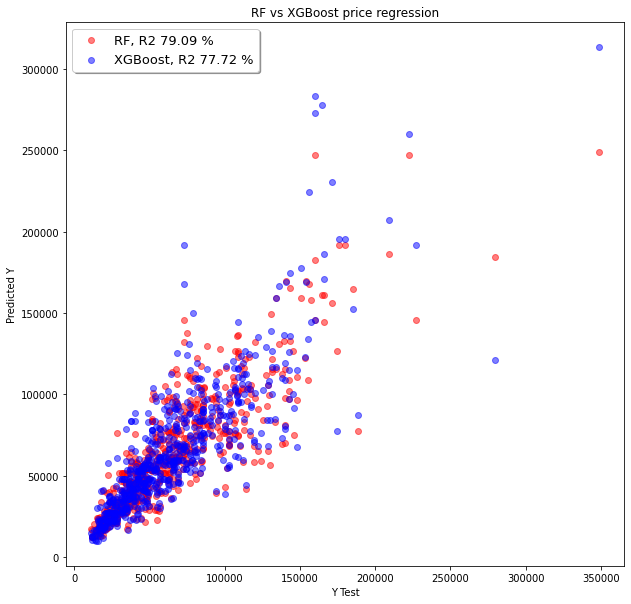

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(np.exp(y_test), np.exp(y_pred), alpha=0.5, color='red',label='RF, R2 {:.2f} %'.format(r2_score(y_test, y_pred)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.5, color='blue',label='XGBoost, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('RF vs XGBoost price regression')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

#**Problem no. 3**

**Machine Learning Meme**

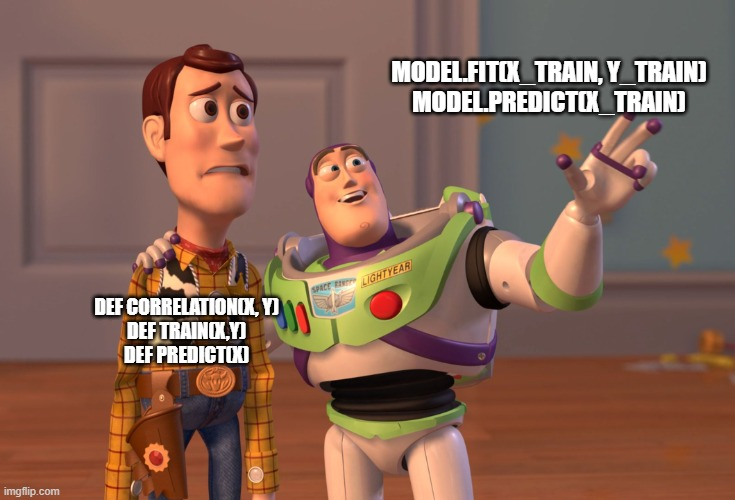

So my meme is from our previous lessons and my experiences. We've been learning linear regression modeling and training manually or without the use of packages that makes us tired. But buzz shows that after learning it, you can use the python packages best for these applications.